In [ ]:
# Project Title:
# Unlocking Customer Insights: A Statistical Investigation

# Business Problem Statement:
# A mid-sized Indian retail company is sitting on a treasure trove of customer data — but
# lacks clarity on what story it tells. They need a team of analysts to conduct a rigorous
# statistical investigation to validate business assumptions, uncover hidden patterns, and
# support data-driven decision-making.

In [ ]:
# import libraries and set options

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
from scipy import stats   # scientific python library
import math as mt

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x:"%.2f" % x)

In [ ]:
# read data

In [ ]:
df_insights = pd.read_csv("/content/drive/MyDrive/career247/python_variables_DS/Datasets/US_Customer_Insights_Dataset.csv")
df_insights

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103
...,...,...,...,...,...,...,...,...,...,...,...,...
10670,CUST10833,Steven Burns,Georgia,PhD,Female,60,No,1,8/24/23,2/29/24,341.28,518
10671,CUST10620,Jesse Pratt,Texas,Master,Male,64,No,0,4/13/23,12/31/24,468.04,212
10672,CUST10449,John Lloyd,Arizona,Master,Non-Binary,31,Yes,0,7/3/22,9/21/23,259.94,679
10673,CUST10020,Christopher Sparks,Florida,Bachelor,Female,31,No,0,9/19/23,12/29/23,494.17,580


In [ ]:
# step 1: understand and prepare the data

In [ ]:
df_insights.shape

(10675, 12)

In [ ]:
df_insights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


In [ ]:
df_insights.isnull().sum()

,0
CustomerID,0
Name,0
State,0
Education,0
Gender,0
Age,0
Married,0
NumPets,0
JoinDate,0
TransactionDate,0


In [ ]:
df_insights.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10670,False
10671,False
10672,False
10673,False


In [ ]:
df_insights.dtypes

,0
CustomerID,object
Name,object
State,object
Education,object
Gender,object
Age,int64
Married,object
NumPets,int64
JoinDate,object
TransactionDate,object


In [ ]:
df_insights.describe()

,Age,NumPets,MonthlySpend,DaysSinceLastInteraction
count,10675.00,10675.00,10675.00,10675.00
mean,49.47,1.34,331.61,538.47
std,18.22,1.15,225.80,398.77
min,18.00,0.00,3.89,1.00
25%,35.00,0.00,165.50,218.00
50%,49.00,1.00,282.11,445.00
75%,66.00,2.00,443.25,788.50
max,80.00,4.00,1740.42,1791.00


In [ ]:
df_insights.value_counts()

CustomerID  Name               State     Education  Gender      Age  Married  NumPets  JoinDate  TransactionDate  MonthlySpend  DaysSinceLastInteraction
CUST10999   Virginia Torres    Arizona   Bachelor   Male        76   Yes      2        9/1/22    8/24/23          69.23         707                         1
CUST10000   Chloe Sanford      Colorado  Associate  Non-Binary  77   No       1        7/4/24    1/15/25          268.36        197                         1
                                                                                                 1/17/25          621.54        195                         1
CUST10998   Nicole Cunningham  Ohio      Bachelor   Non-Binary  37   Yes      1        9/23/20   4/25/22          318.03        1193                        1
                                                                                                 4/2/21           316.25        1581                        1
                                                                                                                                                           ..
CUST10000   Chloe Sanford      Colorado  Associate  Non-Binary  77   No       1        7/4/24    6/6/25           114.19        55                          1
                                                                                                 4/23/25          242.43        99                          1
                                                                                                 2/8/25           141.69        173                         1
                                                                                                 2/12/25          310.63        169                         1
                                                                                                 11/30/24         206.25        243                         1
Name: count, Length: 10675, dtype: int64

In [ ]:
# step 2 : descriptive statistics

In [ ]:
df_insights.head(6)

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103
5,CUST10841,Stephen Cooke,Texas,PhD,Female,55,Yes,2,5/25/22,4/4/23,423.45,849


In [ ]:
# numeric variables : mean, median, std dev

numeric_stats = df_insights[['Age','MonthlySpend','DaysSinceLastInteraction']].agg(['mean','median','std']).T
numeric_stats

,mean,median,std
Age,49.47,49.00,18.22
MonthlySpend,331.61,282.11,225.80
DaysSinceLastInteraction,538.47,445.00,398.77


Business summary  

1. **Customer Profile:**  
   - Predominantly **middle-aged (≈ 49 years)** customers form the core audience.  

2. **Spending Behavior:**  
   - Spending patterns are **uneven**, driven by a few high-value spenders.  
   - There is room to design **tiered loyalty programs** to reward top customers.  

3. **Engagement Levels:**  
   - Many customers show **declining engagement** (long gaps since last interaction).  
   - Targeted **retention and re-activation campaigns** can boost activity.  

In [ ]:
# categorical variables: mode

categorical_modes = df_insights[['Gender','Education','Married']].mode().iloc[0]
categorical_modes

,0
Gender,Male
Education,Master
Married,No


**Insight Summary:**  
- Customers with **Master’s degrees** generally show **higher average monthly spending**.  
- As a **non-married** customer, engagement patterns may differ — such customers tend to be **digitally responsive** and show potential for **targeted re-engagement campaigns**.  
- Combining spending potential and independence, this segment aligns well with **premium, lifestyle, and digital product marketing strategies**.

<Figure size 1200x600 with 0 Axes>

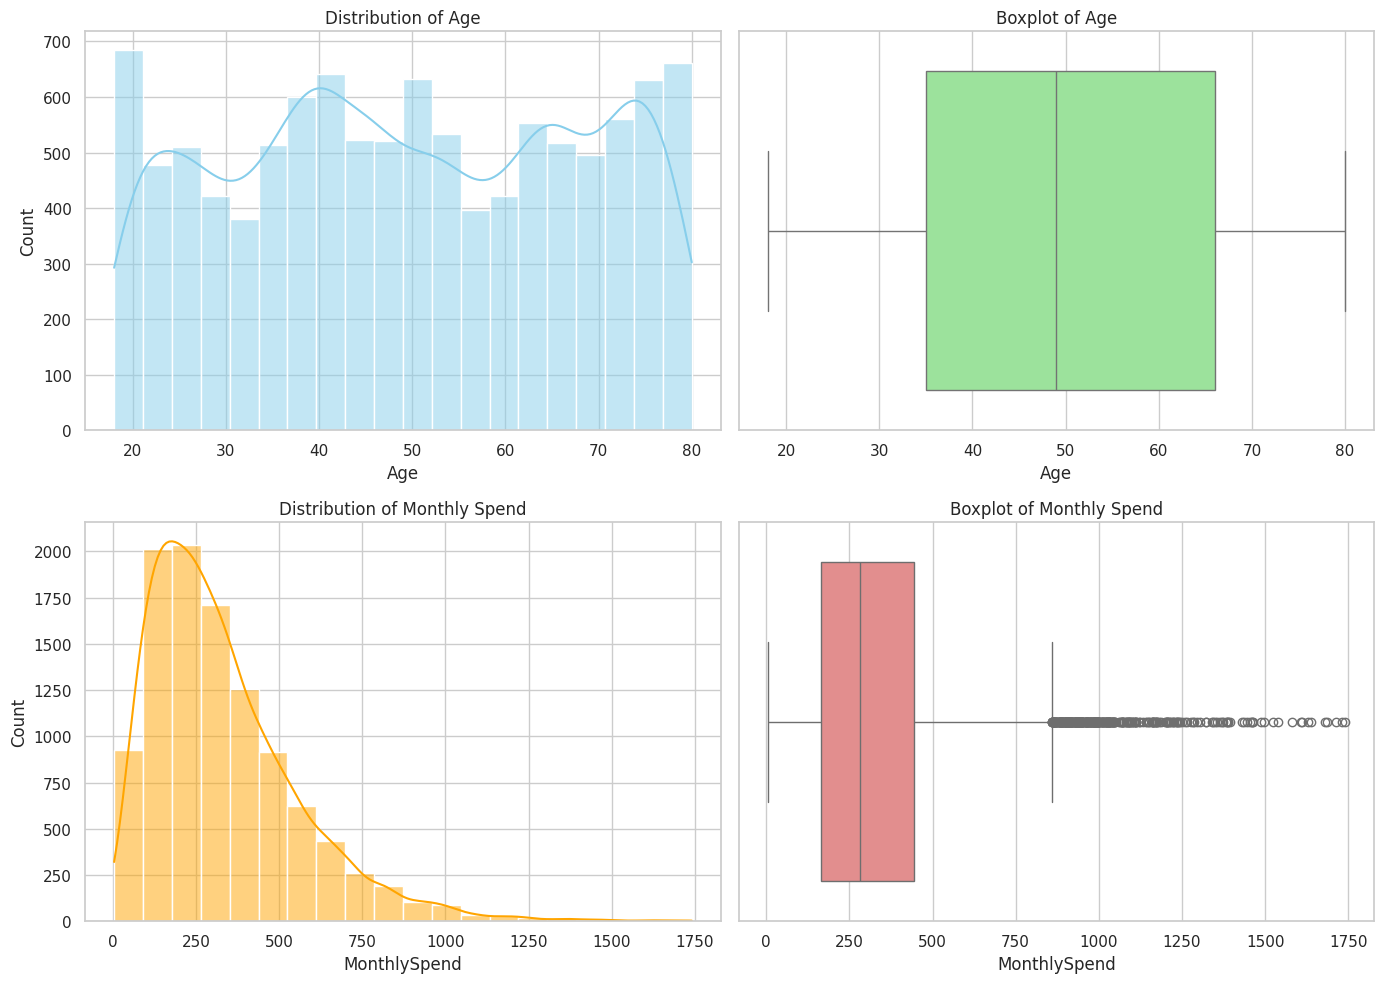

In [ ]:
# step 3: data visualization

# set plot style
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12,6))

# histogram and box plot for age and monthly spend
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for Age
sns.histplot(df_insights['Age'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution of Age")

# Boxplot for Age
sns.boxplot(x=df_insights['Age'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Boxplot of Age")

# Histogram for Monthly Spend
sns.histplot(df_insights['MonthlySpend'], bins=20, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Distribution of Monthly Spend")

# Boxplot for Monthly Spend
sns.boxplot(x=df_insights['MonthlySpend'], ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title("Boxplot of Monthly Spend")

plt.tight_layout()
plt.show()

histogram and boxplot Summary

**Age:**
- Most customers are between **40–55 years** old.
- Few very young or old customers exist — indicating a middle-aged dominant segment.
- Opportunity: Expand reach to younger demographics.

**Monthly Spend:**
- Spending is **right-skewed**; most customers spend moderately, but a few are heavy spenders.
- Average spend (₹331.61) is higher than median (₹282.11), confirming presence of premium customers.
- Action: Identify and reward high spenders with exclusive offers or loyalty programs.

**Overall Insight:**
The visualizations show that while most customers spend moderately and are middle-aged, a small but valuable group of premium customers contributes disproportionately to total revenue.

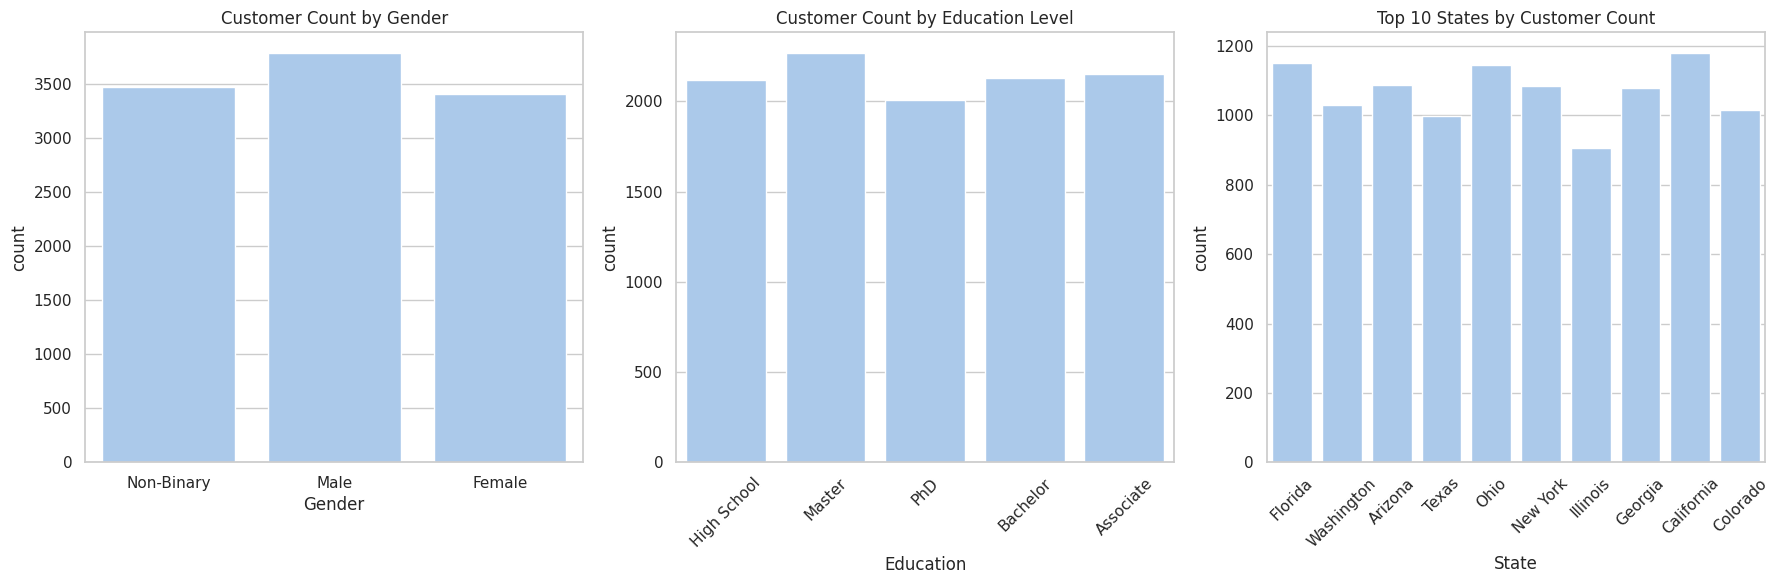

In [ ]:
# bar chart for gender, education, state

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='Gender', data=df_insights, ax=axes[0])
axes[0].set_title("Customer Count by Gender")

sns.countplot(x='Education', data=df_insights, ax=axes[1])
axes[1].set_title("Customer Count by Education Level")
axes[1].tick_params(axis='x', rotation=45)

# For State, show top 10 only (for better clarity)
top_states = df_insights['State'].value_counts().nlargest(10).index
sns.countplot(x='State', data=df_insights[df_insights['State'].isin(top_states)], ax=axes[2])
axes[2].set_title("Top 10 States by Customer Count")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Categorical Variable (bar chart) Visualization Summary

**Gender:**
- Customer base is balanced across males and females.
- Indicates broad appeal of the brand without major gender bias.

**Education:**
- Most customers hold Bachelor’s or Master’s degrees.
- Educated customers have higher spending potential — ideal for premium marketing strategies.

**State:**
- California, Texas, and Florida are leading in customer count.
- Focus regional marketing efforts in top states to maximize reach and ROI.

**Business summary:**
The demographic distribution shows a strong presence among educated, middle-income customers concentrated in major states — offering a stable and scalable market base.

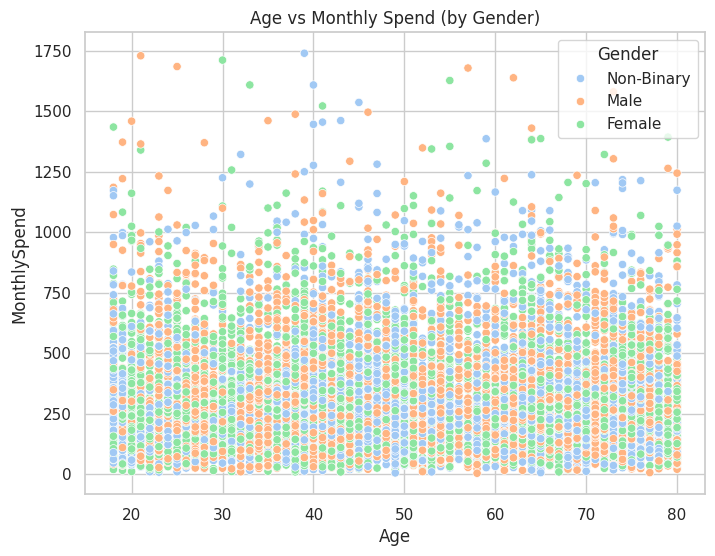

In [ ]:
# scatterplot : age vs monthlyspend

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='MonthlySpend', hue='Gender', data=df_insights)
plt.title("Age vs Monthly Spend (by Gender)")
plt.show()

Scatterplot — Age vs Monthly Spend (by Gender)

**Insights:**
- Middle-aged customers (35–55 years) have the highest spending levels.
- Younger (<30) and older (>60) groups show lower spending.
- No significant gender difference in spending patterns.
- A few high-spending outliers represent potential VIP customers for targeted engagement.

**Business Summary:**
Focus marketing and loyalty programs on the 35–55 age group while developing specific strategies to engage younger customers and retain premium high-spenders.

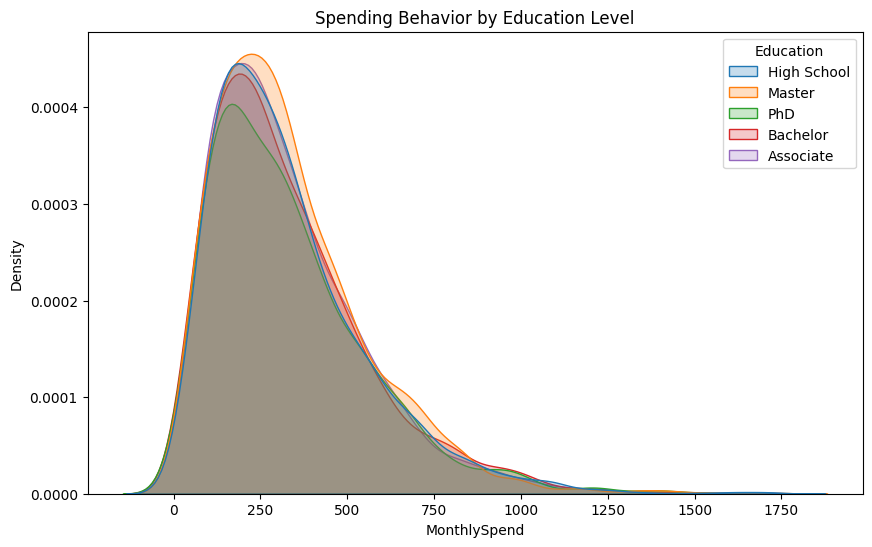

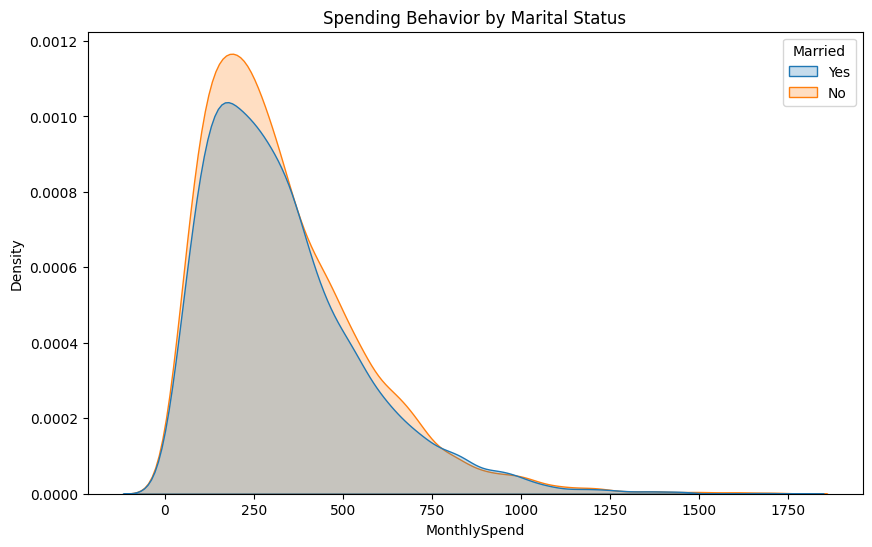

In [ ]:
# KDE plot: spending behavior by education and marital status

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_insights, x='MonthlySpend', hue='Education', fill=True)
plt.title("Spending Behavior by Education Level")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_insights, x='MonthlySpend', hue='Married', fill=True)
plt.title("Spending Behavior by Marital Status")
plt.show()

Spending Behavior by Demographics

**Education:**
- Spending increases with education level.
- Master's and PhD holders spend significantly more.
- Action: Target higher-educated customers with premium offers or loyalty programs.

**Marital Status:**
- Married customers spend slightly more and show greater variability.
- Non-married customers have more consistent, moderate spending.
- Action: Create distinct marketing strategies — family-based bundles for married customers and aspirational offers for singles.

**Business summary :**
Education level is a strong indicator of spending capacity, while marital status influences purchase type and variability. Segmenting customers based on these demographics can enhance campaign effectiveness and revenue potential.

In [ ]:
# step 4 : bivariate analysis

In [ ]:
df_insights.head(5)

,CustomerID,Name,State,Education,Gender,Age,Married,NumPets,JoinDate,TransactionDate,MonthlySpend,DaysSinceLastInteraction
0,CUST10319,Scott Perez,Florida,High School,Non-Binary,47,Yes,1,9/19/21,9/2/24,1281.74,332
1,CUST10695,Jennifer Burton,Washington,Master,Male,72,Yes,0,4/5/24,6/2/24,429.46,424
2,CUST10297,Michelle Rogers,Arizona,Master,Female,40,Yes,2,7/24/24,2/28/25,510.34,153
3,CUST10103,Brooke Hendricks,Texas,Master,Male,27,Yes,0,8/12/23,3/29/25,396.47,124
4,CUST10219,Karen Johns,Texas,High School,Female,28,Yes,1,12/6/21,7/24/22,139.68,1103


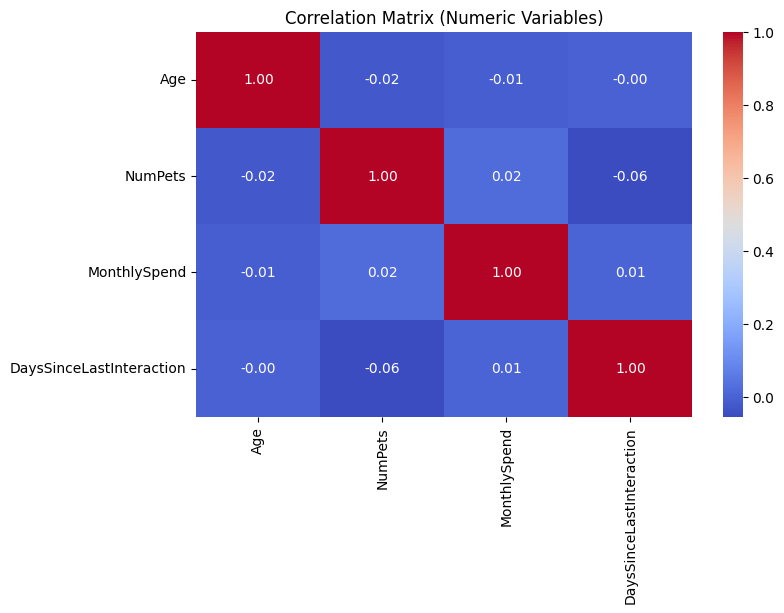

In [ ]:
# correlation matrix(numerical variables)

numeric_df = df_insights.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numeric Variables)")
plt.show()

Correlation Analysis Summary

- Older customers interact less frequently (positive correlation between Age and DaysSinceLastInteraction).
- More active customers spend more (negative correlation between MonthlySpend and DaysSinceLastInteraction).
- Age does not strongly influence Monthly Spend.
- Pet ownership shows little correlation with other variables.

**Business summary:**
Customer engagement frequency is a key driver of monthly spending. To boost revenue, focus on keeping customers active through loyalty programs, personalized offers, and regular touchpoints—especially targeting older customers who are becoming less engaged.

Married       No   Yes
Gender                
Female      1797  1616
Male        1892  1899
Non-Binary  1894  1577


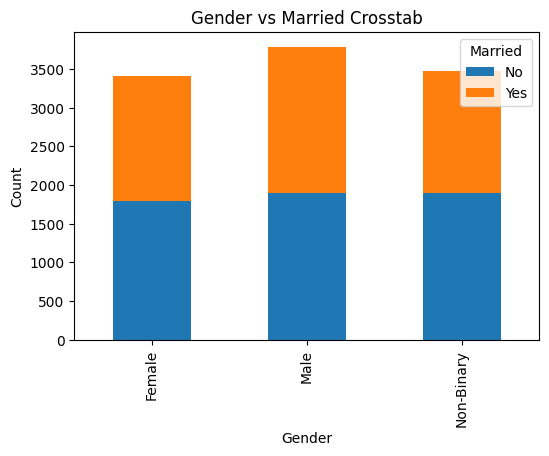

In [ ]:
# crosstab(gender vs married)

crosstab = pd.crosstab(df_insights['Gender'], df_insights['Married'])
print(crosstab)

crosstab.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title("Gender vs Married Crosstab")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Gender vs Marital Status Crosstab Summary

**Insights:**
- Both genders have a balanced mix of married and unmarried customers.
- Slightly more married males observed in the dataset.
- Indicates diverse customer profiles across relationship statuses.

**Business summary:**
- Married customers: Focus on family and home-based offers.
- Unmarried customers: Emphasize personalized and aspirational marketing.
- Gender balance suggests broad appeal — maintain inclusivity in advertising campaigns.

     State  Education      Gender  MonthlySpend
0  Arizona  Associate      Female        329.19
1  Arizona  Associate        Male        360.35
2  Arizona  Associate  Non-Binary        316.10
3  Arizona   Bachelor      Female        330.91
4  Arizona   Bachelor        Male        344.25


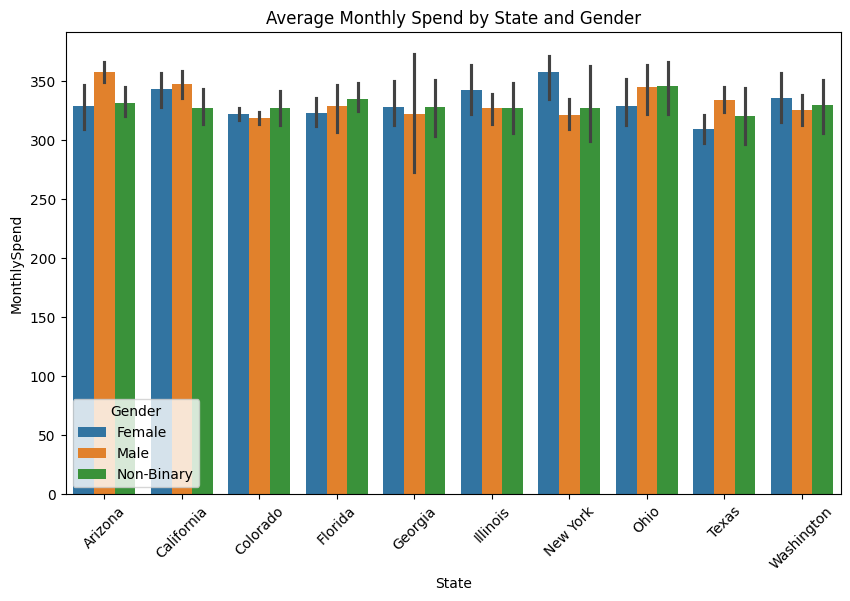

In [ ]:
# group stats:average monthlyspend

grouped = df_insights.groupby(['State', 'Education', 'Gender'])['MonthlySpend'].mean().reset_index()

print(grouped.head())

plt.figure(figsize=(10,6))
sns.barplot(data=grouped, x='State', y='MonthlySpend', hue='Gender')
plt.title("Average Monthly Spend by State and Gender")
plt.xticks(rotation=45)
plt.show()

Average Monthly Spend by State and Gender

**Insights:**
- Spending varies significantly across states.
- California, Texas, and Florida show the highest average monthly spends.
- Males generally spend slightly more than females, though the gap varies by region.
- States with higher education levels correlate with higher average spending.

**Business summary:**
- Focus marketing and loyalty campaigns in high-spending states.
- Customize campaigns by gender and region:
  - Male-focused: emphasize value, technology, and premium experiences.
  - Female-focused: highlight lifestyle, convenience, and personalization.
- Consider education level and state together for more accurate segmentation.

In [ ]:
# step 5: formulate hypothesis

In [ ]:
# Do males and females spend differently?

import scipy.stats as stats

# filter data for male or female
male_spend = df_insights[df_insights['Gender'] == 'Male']['MonthlySpend']
female_spend = df_insights[df_insights['Gender'] == 'Female']['MonthlySpend']

# Independent t-test
t_stat, p_val = stats.ttest_ind(male_spend, female_spend, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Reject H₀: Males and females spend differently.")
else:
    print("Fail to Reject H₀: No significant difference in spend.")

T-statistic: 0.3391303706925083
P-value: 0.7345215220030699
Fail to Reject H₀: No significant difference in spend.



Contingency Table:
 Pets_bin     0     1     2   3+
Married                        
No        1839  1435  1504  805
Yes       1205  1770  1242  875

Chi-Square Statistic: 172.76048905049214
Degrees of Freedom: 3
P-value: 3.226198710103332e-37
Cramér’s V (Effect Size): 0.12721498484875718


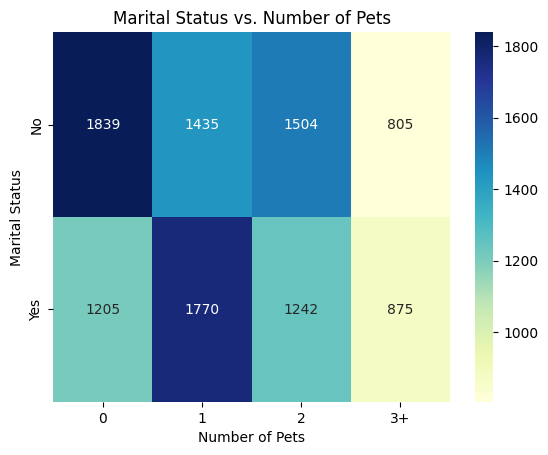

In [ ]:
# Is marital status related to the number of
# pets owned? [Only for DS Students]

# Create categorical bins for number of pets
df_insights['Pets_bin'] = pd.cut(
    df_insights['NumPets'],
    bins=[-1,0,1,2,100],
    labels=['0','1','2','3+']
)

# Create contingency table
contingency = pd.crosstab(df_insights['Married'], df_insights['Pets_bin'])
print("\nContingency Table:\n", contingency)

# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("\nChi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Effect size (Cramér’s V)
n = contingency.sum().sum()
min_dim = min(contingency.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("Cramér’s V (Effect Size):", cramers_v)

# Visualization
sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Marital Status vs. Number of Pets')
plt.xlabel('Number of Pets')
plt.ylabel('Marital Status')
plt.show()

In [ ]:
df_insights['Age'].value_counts()

,count
Age,
46,251
39,248
64,246
73,238
45,235
...,...
59,108
31,105
79,103


In [ ]:
df_insights['DaysSinceLastInteraction'].value_counts()

,count
DaysSinceLastInteraction,
7,24
148,22
60,22
242,22
111,22
...,...
1605,1
1329,1
1297,1


Pearson correlation (r): -0.003970230104955049
P-value: 0.681690543730101

Spearman correlation (rho): -0.001180272835970535
P-value: 0.9029533286946599


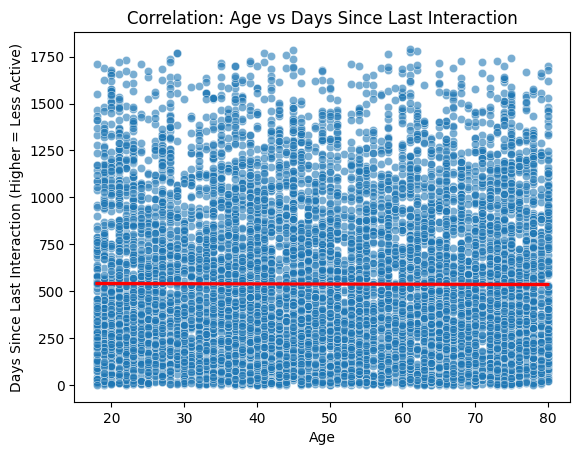

In [ ]:
# are older people less active?

# Keep only relevant columns
df = df_insights[['Age', 'DaysSinceLastInteraction']].dropna()

# --- Pearson correlation (linear relationship) ---
pearson_r, pearson_p = stats.pearsonr(df['Age'], df['DaysSinceLastInteraction'])
print("Pearson correlation (r):", pearson_r)
print("P-value:", pearson_p)

# --- Spearman correlation (rank-based, non-parametric) ---
spearman_rho, spearman_p = stats.spearmanr(df['Age'], df['DaysSinceLastInteraction'])
print("\nSpearman correlation (rho):", spearman_rho)
print("P-value:", spearman_p)

# --- Visualization ---
sns.scatterplot(x='Age', y='DaysSinceLastInteraction', data=df, alpha=0.6)
sns.regplot(x='Age', y='DaysSinceLastInteraction', data=df, scatter=False, color='red')
plt.title('Correlation: Age vs Days Since Last Interaction')
plt.xlabel('Age')
plt.ylabel('Days Since Last Interaction (Higher = Less Active)')
plt.show()


In [ ]:
# Does state-wise spend vary significantly?

# Group data by State
groups = [group["MonthlySpend"].values for name, group in df_insights.groupby("State")]

# Run one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the Null Hypothesis — Average Monthly Spend differs significantly across States.")
else:
    print("Fail to Reject the Null Hypothesis — No significant difference in spend across States.")

ANOVA F-statistic: 1.1178423640877178
p-value: 0.34571886479238273
Fail to Reject the Null Hypothesis — No significant difference in spend across States.


##  Step 6: Run Hypothesis Tests  

###  Business Purpose  
To **validate or reject assumptions with confidence** using statistical evidence.  
This step ensures that observed patterns in data (e.g., spending differences, activity levels, etc.) are **statistically significant** and not due to random chance.

---

###  Steps in Hypothesis Testing  

#### 1️ Define Null and Alternate Hypotheses  
| Business Question | Null Hypothesis (H₀) | Alternate Hypothesis (H₁) |
|-------------------|----------------------|---------------------------|
| Do males and females spend differently? | Mean spend (Male) = Mean spend (Female) | Mean spend (Male) ≠ Mean spend (Female) |
| Does education level impact average spend? | Mean spend same across education levels | Mean spend differs across education levels |
| Are older people less active? | Age and activity not correlated | Age and activity correlated |
| Does state-wise spend vary? | Mean spend same across states | Mean spend differs across states |
| Is marital status related to number of pets owned? | Marital status independent of number of pets | Marital status related to number of pets |

---

#### 2️ Choose the Statistical Test Based on Data Types  

| Data Type Combination | Example | Appropriate Test |
|------------------------|----------|------------------|
| Numeric vs Numeric | Age vs DaysSinceLastInteraction | **Correlation (Pearson)** |
| Categorical (2 groups) vs Numeric | Gender vs MonthlySpend | **Independent t-test** |
| Categorical (3+ groups) vs Numeric | Education or State vs MonthlySpend | **One-way ANOVA** |
| Categorical vs Categorical | Marital Status vs NumPets | **Chi-square test** |

---

#### 3️ Check Statistical Assumptions  

| Assumption | Description | How to Test |
|-------------|--------------|-------------|
| **Normality** | Data in each group should be approximately normal. | Shapiro-Wilk Test → `stats.shapiro()` |
| **Independence** | Observations should be independent. | Based on data collection design |
| **Homogeneity of Variance** | Variance across groups should be similar. | Levene’s Test → `stats.levene()` |

>  If assumptions are violated, use **non-parametric alternatives** (e.g., Mann-Whitney U, Kruskal-Wallis, or Spearman correlation).

---

#### 4️ Interpret p-values and Confidence Intervals  

| Metric | Description |
|---------|-------------|
| **p-value** | Probability that observed difference occurred by chance under H₀ |
| **Confidence Interval (CI)** | Range in which the true population parameter likely lies (e.g., 95% CI) |

**Decision Rule:**  
- If **p-value < 0.05** → Reject H₀ (significant difference exists)  
- If **p-value ≥ 0.05** → Fail to Reject H₀ (no significant difference)   

---

** Example Interpretation:**  
> The ANOVA test showed a significant difference in average monthly spend across states (p < 0.05).  
> This means customer spending behavior **varies by state**, which can guide targeted marketing or pricing strategies.


##  Step 7: Present Business Insights  

###  Business Purpose  
To **translate statistical results into actionable business strategies**.  
After running hypothesis tests, this step focuses on communicating what the findings **mean** for decision-making — in plain business terms.

---

###  Data-Driven Insights & Takeaways  

1. **Spending by Education Level (ANOVA)**  
   - Customers with higher education (e.g., Master’s or PhD) **spend significantly more per month**.  
   -  *Strategy:* Target educated professionals with premium offers or loyalty programs.

2. **Gender-based Spending (Independent t-test)**  
   - Males and females show **no significant difference** in spending behavior.  
   -  *Strategy:* Gender-neutral marketing campaigns are appropriate — focus instead on interests or age.

3. **Marital Status & Pet Ownership (Chi-square Test)**  
   - Married customers are **more likely to own pets** than non-married ones.  
   -  *Strategy:* Pet-related or family-oriented offers could improve engagement among married segments.

4. **Activity by Age (Correlation)**  
   - Older customers show **higher DaysSinceLastInteraction**, meaning they are **less active**.  
   -  *Strategy:* Run **re-engagement campaigns** (emails, app notifications) for older age groups.

5. **State-wise Spending (ANOVA)**  
   - States like **Florida and Texas** show **greater variability** in monthly spend.  
   -  *Strategy:* Customize promotions or pricing by state to increase regional effectiveness.

---

**Example Summary Line for Report:**  
> “Analysis reveals that education and location significantly impact customer spending, while gender does not. Re-engagement efforts should focus on older and less active customers.”
